# Activity 02

In [4]:
%matplotlib inline

# Imports
import collections
import requests
import matplotlib.pyplot as plt

In [5]:
# TODO: Fetch demographic data
URL = 'https://www3.nd.edu/~pbui/teaching/cse.20289.sp18/static/csv/demographics.csv'
response  = requests.get(URL).text

gender_data=dict()
ethnicity_data=dict()
year_list=list()


# TODO: Extract years from header line (ie. first line)
year_row = response.split('\n',1)[0]
for year in year_row.strip(',').split(',,'):
    year = int(year)
    gender_data[year] = dict()
    ethnicity_data[year] = dict()
    year_list.append(year)

#print(gender_data)
response = response.split('\n',1)[1:]

# TODO: Extract data corresponding to each year (ie. remaining lines)

for row in response[0].split('\n'):
    row_elements = row.strip().split(',')
    for (gender,ethnicity,year) in zip(row_elements[::2], row_elements[1::2], year_list):
        if gender == '':
            continue
        elif gender_data[year].get(gender):
            gender_data[year][gender] += 1
        else:
            gender_data[year][gender] = 1

        if ethnicity == '':
            continue
        elif ethnicity_data[year].get(ethnicity):
            ethnicity_data[year][ethnicity] += 1
        else:
            ethnicity_data[year][ethnicity] = 1

In [6]:
def plot_gender_pct(data):
    fig, ax = plt.subplots(1,1,figsize=(10, 8))
    years   = sorted(data.keys())
    males   = []
    females = []
    for year in years:
        m = data[year]['M']
        f = data[year]['F']
        t = m + f
        males.append(m * 100.0 / t)
        females.append(f * 100.0 / t)

    ax.bar(years, females, color='r', label='Female')
    ax.bar(years, males, bottom=females, color='b', label='Male')

    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    plt.show()

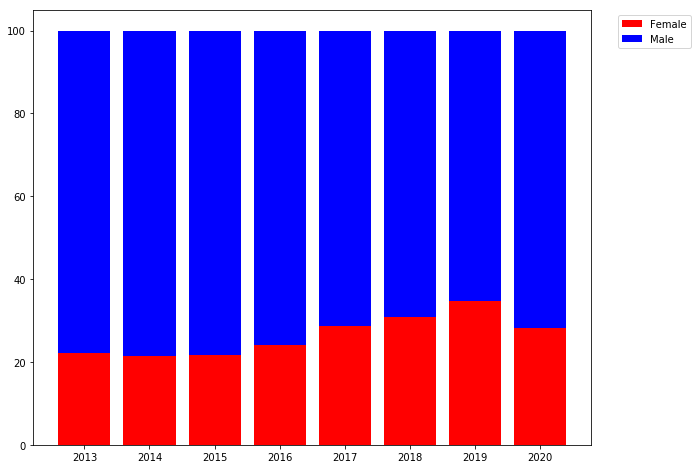

In [7]:
plot_gender_pct(gender_data)

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def load_ethnicity(ethnic_abbrev, data_year):
    if data_year.get(ethnic_abbrev):
        return data_year[ethnic_abbrev]
    else:
        return 0


def plot_ethnicity_pct(data):

    years   = sorted(data.keys())
    caucasian   = []
    asian = []
    hispanic = []
    black = []
    native = []
    multiple = []
    undeclared = []
    for year in years:
            c = load_ethnicity('C',data[year])
            o = load_ethnicity('O',data[year])
            s = load_ethnicity('S',data[year])
            b = load_ethnicity('B',data[year])
            n = load_ethnicity('N',data[year])
            t = load_ethnicity('T',data[year])
            u = load_ethnicity('U',data[year])
            tot = c + o + s + b + n + t + u
            caucasian.append(c * 100.0 / tot)
            asian.append(o * 100.0 / tot)
            hispanic.append(s * 100.0 / tot)
            black.append(b * 100.0 / tot)
            native.append(n * 100.0 / tot)
            multiple.append(t * 100.0 / tot)
            undeclared.append(u * 100.0 / tot)

    #y = np.row_stack(caucasian, asian, hispanic, black, native, multiple, undeclared)
    x = years


    fig, ax = plt.subplots()
    labels = ['Caucasian','Asian','Hispanic','Black','Native','Multiple','Undeclared']
    ax.stackplot(x, caucasian, asian, hispanic, black, native, multiple, undeclared, labels=labels)
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    plt.show()

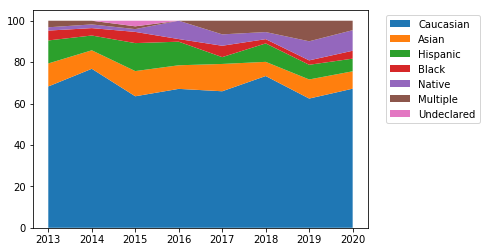

In [12]:
plot_ethnicity_pct(ethnicity_data)

1 Overview

    In this activity we plot the gender and ethnicity data of the Notre Dame computre science and engineering students for the past 8 years. Thanks to proffessor Ramzi who collected the data in character format, we are able to to analyze them in statistics. My takeaway is knowing how to actually extract and display data from raw string can be very powerful.
    
 
2 Methodology
    
    We first fetch the demographics data. We are able to first strip the first line of data in our given string which is the all the years. We then store the year info in a list. Additionally, we use split up the rest of the code and assign them to two different dictionaries. We plot the information in the dictionaries and display them using a function. I was able to implement(divide and conquer) each methods patiently and effectively.

3 Analysis

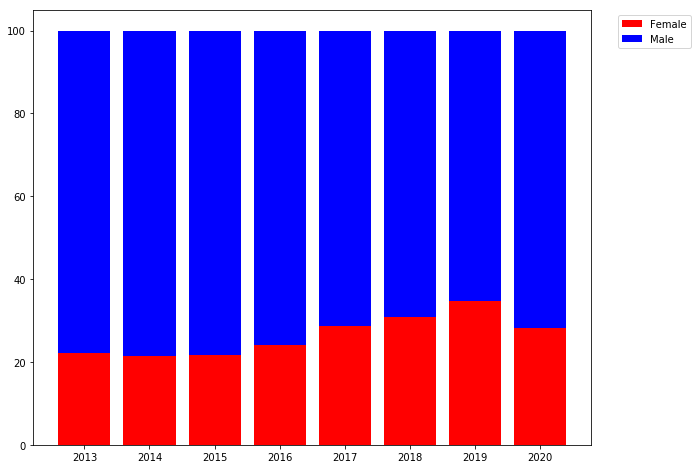

In [13]:
plot_gender_pct(gender_data)

As we can see, for the past 8 years, we do not have a very good gender diversity as there were more than 60 percent of the class. 

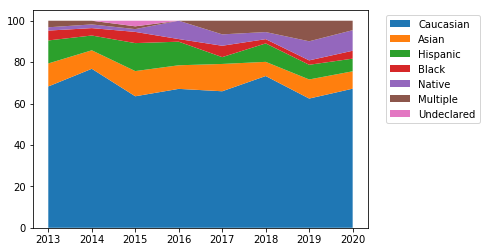

In [14]:
plot_ethnicity_pct(ethnicity_data)

In this lab, for the past 8 years, we have more than 60 percent white CSE students in our class. This is also not amazing.

4 Discussion


As a minority, I do not believe the issue of gender and ethnic diversity is important to me. I do not think the department should work to increase diversity either. However, we should all have a good attitude and have an open mind to all the diversity.

The Computer Science and Engineering department should provide a welcoming and supportive learning environment to all students. It can have a lot more open coding nights where non comp sci major students can learn a little bit about how to program and potentially be interested in the material and the subject.

I believe that I have been taking a lot of extra unecessary science classes my freshman year which have not helped me at all through the studying of my major classes. I believe the CSE department should open up to more options for students to complete the program apart from the EG path. 